## Make_dataset

* Task를 샘플링한다.
    * A는 1 ~ 11의 범위, B와 C는 0.5 ~ 2의 범위
    * 총 Task는 100개
    * 각 Task별로 5000개의 데이터를 사용한다.

In [11]:
import numpy as np
import pyDOE
import matplotlib.pyplot as plt
from glob import glob

## Governing equation
def func1(x,y,a=1,b=1,c=1):
    return a*np.sin(b*x)*np.sin(c*y)

## Train Task sampling 
train_sampling = pyDOE.lhs(3, samples=100)
A_sampling = 1.0+(train_sampling.T[0])*10
B_sampling = 0.5+(train_sampling.T[1])*1.5
C_sampling = 0.5+(train_sampling.T[2])*1.5
train_sampling = np.stack([A_sampling,B_sampling,C_sampling],axis=1)

## Test Interpolation Task sampling 
inter_sampling = pyDOE.lhs(3, samples=10)
A_sampling = 1.0+(inter_sampling.T[0])*10
B_sampling = 0.5+(inter_sampling.T[1])*1.5
C_sampling = 0.5+(inter_sampling.T[2])*1.5
inter_sampling = np.stack([A_sampling,B_sampling,C_sampling],axis=1)

## Test Extrapolation Task sampling 
extra_sampling = pyDOE.lhs(3, samples=10)
A_sampling = 11+(extra_sampling.T[0])
B_sampling = 2+(extra_sampling.T[1])
C_sampling = 2+(extra_sampling.T[2])
extra_sampling = np.stack([A_sampling,B_sampling,C_sampling],axis=1)

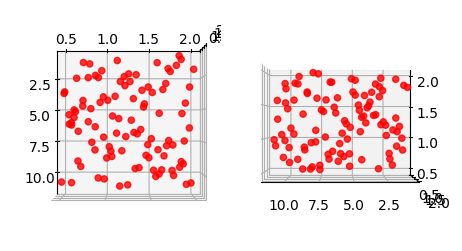

In [12]:
# Creating figure
color_list = ["red", "blue", "green"]
# Creating plot
fig = plt.figure(figsize=(10,3))
wf = fig.add_subplot(111, projection='3d')
x = train_sampling.T[0]
y = train_sampling.T[1]
f = train_sampling.T[2]
wf.scatter3D(x, y, f, color = "r", alpha=0.8)
wf.view_init(90, 0)

wf = fig.add_subplot(122, projection='3d')
x = train_sampling.T[0]
y = train_sampling.T[1]
f = train_sampling.T[2]
wf.scatter3D(x, y, f, color = "r", alpha=0.8)
wf.view_init(0, 90)
plt.show()

In [16]:
# 100*5000개의 interpolation_sampling data
with open(f'./data/train_sampling.npy', 'wb') as f:
    write_data = []
    for idx, Task in enumerate(train_sampling):
        # 각 Task 별로 -pi ~ pi 사이의 (x,y) 데이터 5000개 생성
        sample_data = pyDOE.lhs(2, samples=5000)
        sample_data -= 0.5
        sample_data *= 2 * np.pi
        result = np.array([func1(i[0],i[1],a=Task[0],b=Task[1],c=Task[2]) for i in sample_data])
        train_data = np.concatenate([sample_data, result[:,None], Task[None,:].repeat(5000, axis=0)], axis=1)
        write_data.append(train_data)
    np.save(f, np.concatenate(write_data, axis=0))
f.close()

In [17]:
# 10*5000개의 interpolation_sampling data
with open(f'./data/inter_sampling.npy', 'wb') as f:
    write_data = []
    for idx, Task in enumerate(inter_sampling):
        # 각 Task 별로 -pi ~ pi 사이의 (x,y) 데이터 5000개 생성
        sample_data = pyDOE.lhs(2, samples=5000)
        sample_data -= 0.5
        sample_data *= 2 * np.pi
        result = np.array([func1(i[0],i[1],a=Task[0],b=Task[1],c=Task[2]) for i in sample_data])
        train_data = np.concatenate([sample_data, result[:,None], Task[None,:].repeat(5000, axis=0)], axis=1)
        write_data.append(train_data)
    np.save(f, np.concatenate(write_data, axis=0))
f.close()

In [18]:
# 10*5000개의 extra_sampling data

with open(f'./data/extra_sampling.npy', 'wb') as f:
    write_data = []
    for idx, Task in enumerate(extra_sampling):
        # 각 Task 별로 -pi ~ pi 사이의 (x,y) 데이터 5000개 생성
        sample_data = pyDOE.lhs(2, samples=5000)
        sample_data -= 0.5
        sample_data *= 2 * np.pi
        result = np.array([func1(i[0],i[1],a=Task[0],b=Task[1],c=Task[2]) for i in sample_data])
        train_data = np.concatenate([sample_data, result[:,None], Task[None,:].repeat(5000, axis=0)], axis=1)
        write_data.append(train_data)
    np.save(f, np.concatenate(write_data, axis=0))
f.close()